In [1]:
import numpy as np # Advanced mathematical functions and linear algebra
import pandas as pd # Data processing ,Data analytics and easy CSV input / output
import seaborn as sns # make a niser plots-updates matplotlib plots
import matplotlib.pyplot as plt #Basic plotting functionality like in MATLAB 
import missingno as msno # mising value visualizations
%matplotlib inline 


In [2]:
macro=pd.read_csv('../ADS-Final-Project-Sberbank/macro.csv/macro.csv')
train=pd.read_csv("../ADS-Final-Project-Sberbank/train.csv/train.csv")
test=pd.read_csv("../ADS-Final-Project-Sberbank/test.csv/test.csv")

In [3]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

## Part One - remove all outliers and then convert the NaN fro mthe outlier to some data 

In [4]:
#clean data
bad_index = train[train.life_sq > train.full_sq].index
train.ix[bad_index, "life_sq"] = np.NaN

bad_index = train[train.life_sq<5].index
train.ix[bad_index, "life_sq"] = np.NaN

bad_index = train[train.full_sq<5].index
train.ix[bad_index, "full_sq"] = np.NaN

bad_index = train[train.kitch_sq<5].index
train.ix[bad_index, "kitch_sq"] = np.NaN

#
bad_index = train[train.build_year < 1500].index
train.ix[bad_index, "build_year"] = np.NaN

bad_index = train[train.build_year > 2018].index
train.ix[bad_index, "build_year"] = np.NaN

#
bad_index = train[train.state == 33].index
train.ix[bad_index, "state"] = 3

#
bad_index = train[train.num_room <= 0].index
train.ix[bad_index, "num_room"] = np.NaN

bad_index = train[train.build_year < 1500].index
train.ix[bad_index, "build_year"] = np.NaN
#
bad_index = train[train.floor > train.max_floor].index
train.ix[bad_index, "max_floor"] = np.NaN


In [5]:
Y=train['price_doc']
X=train.drop(['id','price_doc'],axis=1)

In [6]:
import random

columnames=np.array(train.columns.values)
objfilter=np.array(list(train.dtypes==object),dtype=bool)
objnames=columnames[objfilter]
X = X.drop(list(objnames),axis=1)
X = X.astype(np.float32)


## XGB

In [7]:
import xgboost as xgb

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:

random.seed(a=11)
rows=random.sample(range(0,len(train)-1), int(len(train)*0.9))
Xtrain=X.ix[rows]
Ytrain=Y.ix[rows]
Xtest=X.drop(rows)
Ytest=Y.drop(rows)


dtrain=xgb.DMatrix(Xtrain, Ytrain, feature_names=Xtrain.columns.values)
dtest=xgb.DMatrix(Xtest,feature_names=Xtrain.columns.values)

In [18]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

model=xgb.train(dict(xgb_params, silent=0),dtrain,num_boost_round=1000)



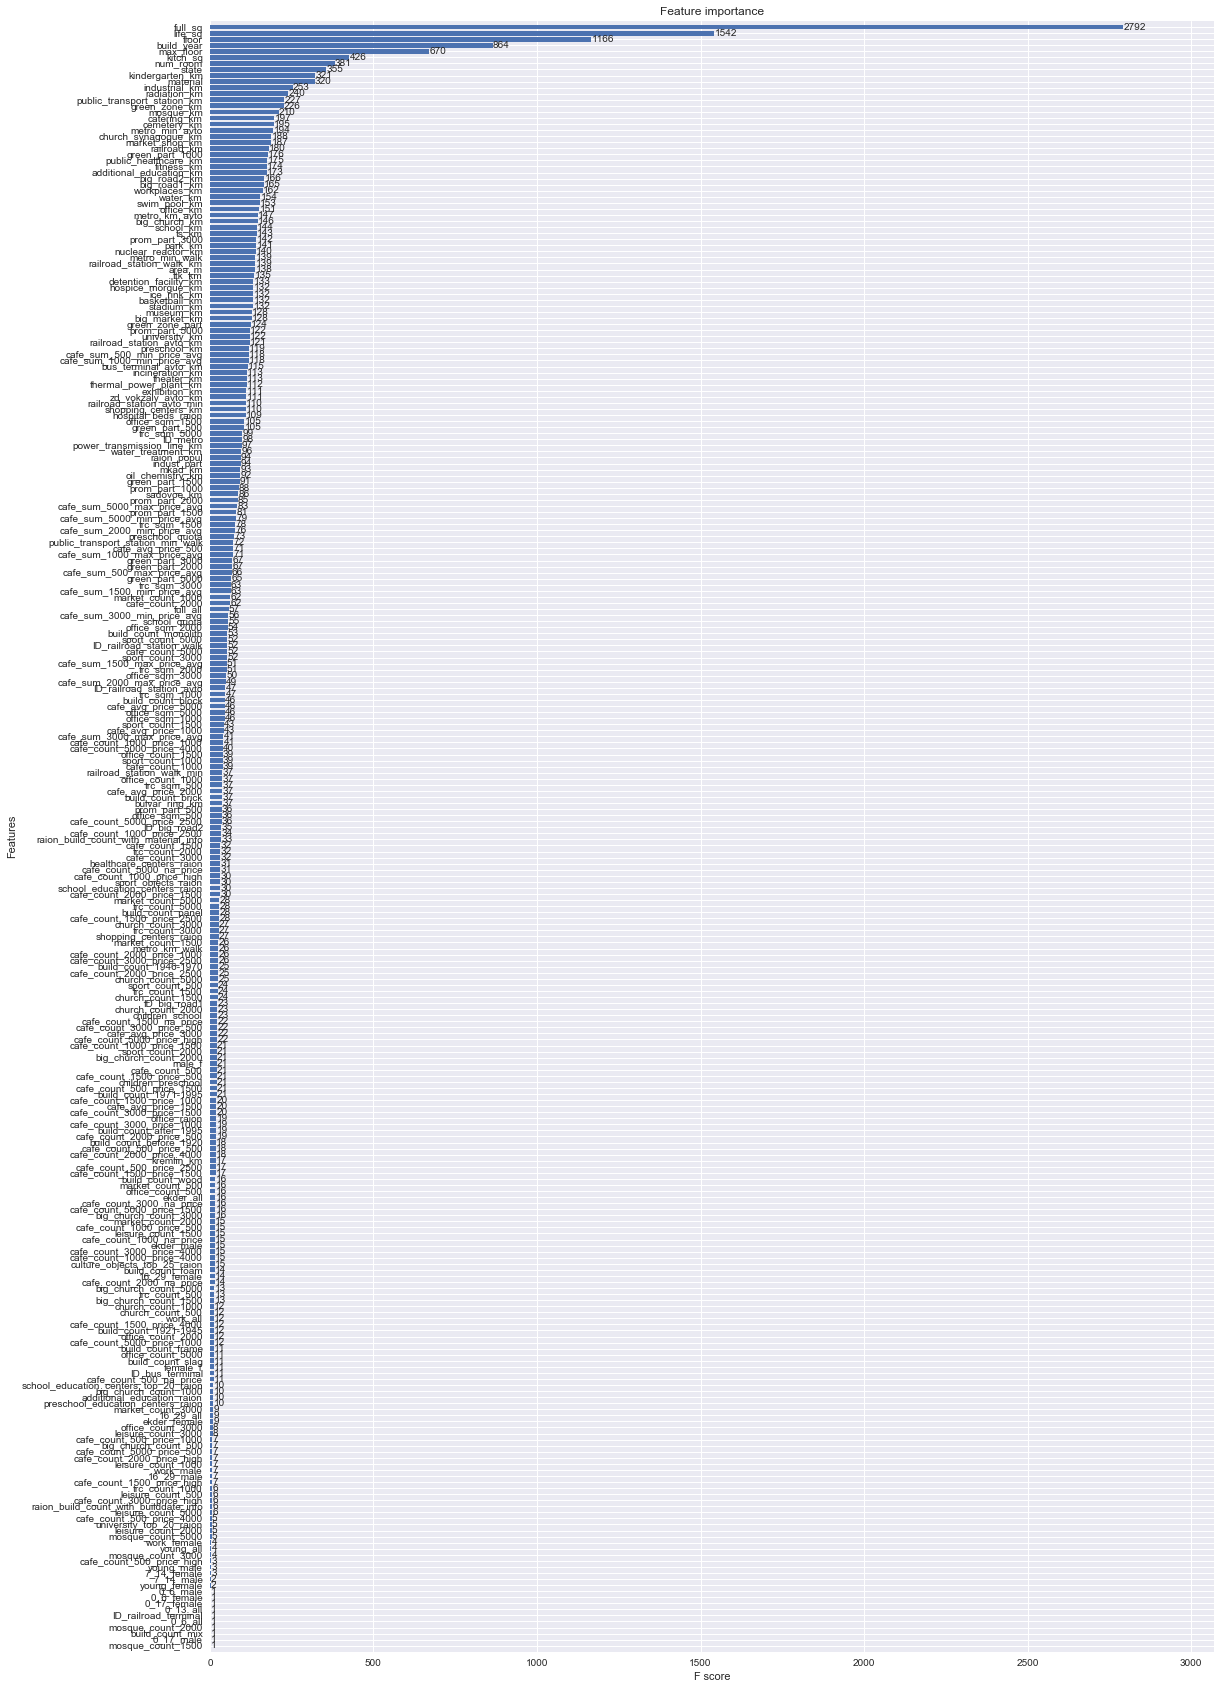

In [14]:
fig, ax = plt.subplots(figsize=(18, 30))
xgb.plot_importance(model, height=0.8, ax=ax)

In [16]:
dtest=xgb.DMatrix(Xtest,feature_names=Xtest.columns.values)
prediction=model.predict(dtest)

array([ 6096756.5,  6428941.5,  5172522.5, ...,  9820882. ,  5324592. ,
        5886690.5], dtype=float32)